KNN ALGORITHM is a machine learning algorithm that predicts on data values on the basis of clusters formed. It owrks by calculating the eucleadian distance between the features and the input values.

The full form is K nearest neighbour algorithm. It assigns the outcome based ont the data value with which it has the smallest eucledian distance.

We assign k as specific value , out of those values. W eassignt the weight with the majority occurance as the predicted values of the testing data.


In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [121]:
df=pd.read_csv("diabetes.csv")
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [122]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [123]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

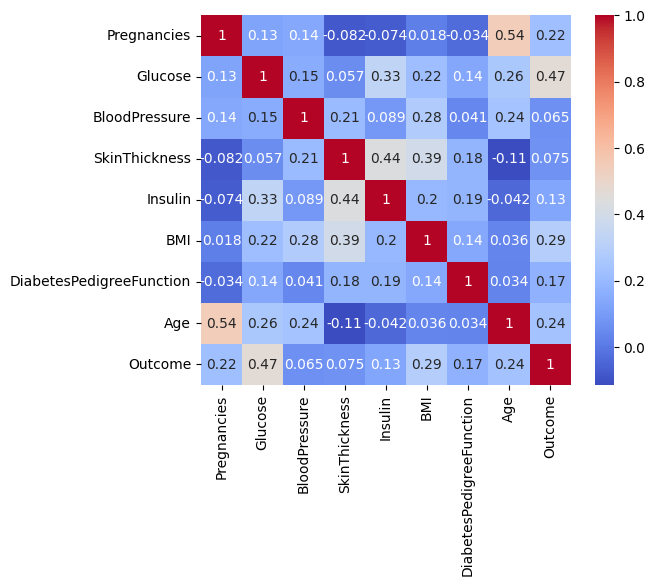

In [124]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',square=True)

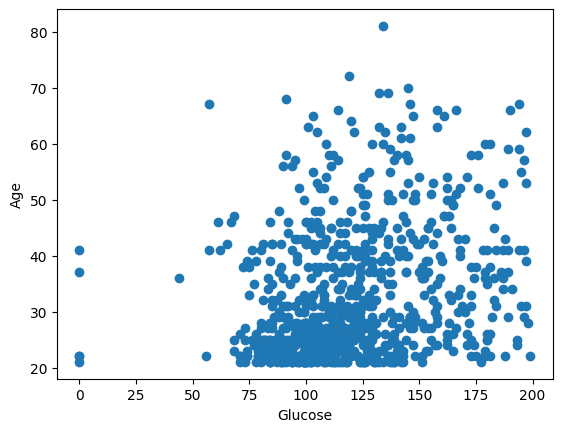

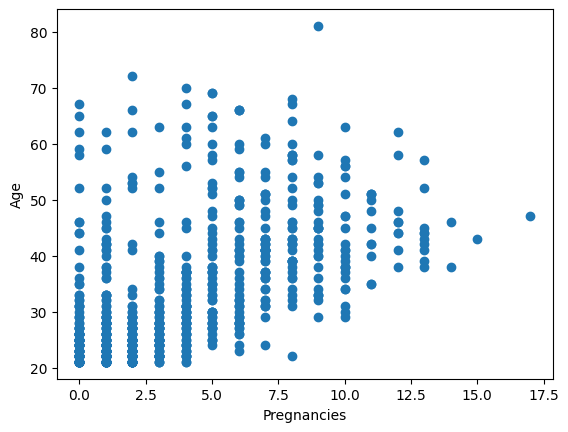

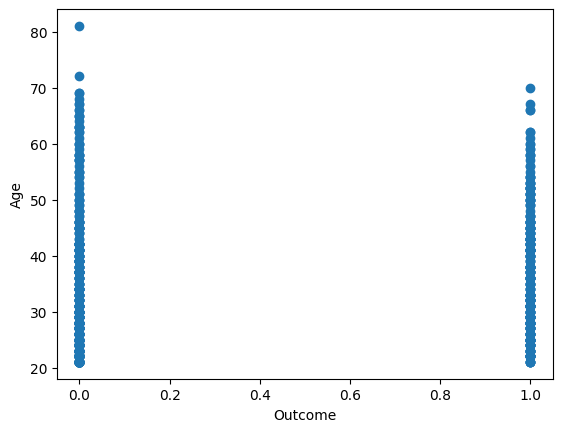

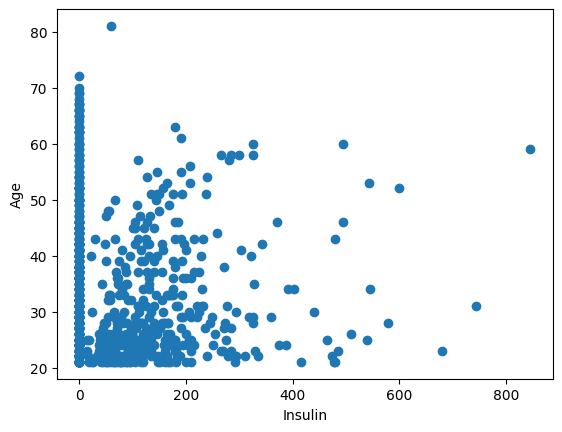

In [125]:
plt.scatter(df['Glucose'],df['Age'])
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.show()
plt.scatter(df['Pregnancies'],df['Age'])
plt.xlabel('Pregnancies')
plt.ylabel('Age')
plt.show()
plt.scatter(df['Outcome'],df['Age'])
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()
plt.scatter(df['Insulin'],df['Age'])
plt.xlabel('Insulin')
plt.ylabel('Age')
plt.show()

In [126]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [127]:
class KNN_ALGORITHM:
    def __init__(self,k):
        self.k=k

    def eucledian(self,v1,v2):
        return np.sqrt(np.sum((v1-v2)**2))
    
    def fit(self,x_train,y_train):
        self.X_train=x_train
        self.y_train=y_train

    def k_nearest(self,test_row):
        distances=[]
        for row,Class in zip(self.X_train,self.y_train):
            dist=self.eucledian(row,test_row)
            distances.append((dist,Class))

        distances.sort()
        neighbours=[distances[i][1] for i in range(self.k)]
        return neighbours
    
    def  predict(self, X_test):
        pred =[]
        for test_row in X_test:
            nearest = self.k_nearest(test_row)
            counts = np.bincount(nearest)
            majority = np.argmax(counts)
            pred.append(majority)
        return np.array(pred)

    def accuracy(self,pred,y_test):
        return (100*(pred==y_test).mean())

In [128]:
size=len(df)
s=np.sqrt(size)
kk=np.floor(s)-1
print(kk)

model=KNN_ALGORITHM(25)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

X_train = np.array(X_train, dtype=float)
X_test = np.array(X_test, dtype=float)

model.fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy=model.accuracy(prediction,y_test)
print(accuracy)
print(prediction)


26.0
77.05627705627705
[0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0]


In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model=KNeighborsClassifier(25)

model.fit(X_train,y_train)
predict=model.predict(X_test)
print(predict)
accuracy=accuracy_score(y_test,predict)
print(f"{round(accuracy*100,2)}%")

print(classification_report(y_test, prediction))


[0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0]
77.06%
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       155
           1       0.73      0.47      0.58        76

    accuracy                           0.77       231
   macro avg       0.76      0.69      0.71       231
weighted avg       0.77      0.77      0.75       231



In [130]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,prediction))

[[142  13]
 [ 40  36]]
